In [1]:
import pandas as pd
import datetime as datetime
import time

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
url = 'https://redfin-public-data.s3.us-west-2.amazonaws.com/redfin_market_tracker/zip_code_market_tracker.tsv000.gz'

start = time.time()
df = pd.read_csv(url, compression = 'gzip', sep = '\t', on_bad_lines = 'skip')

# end time
execution = (time.time() - start)
print('Execution time in minutes: ' + str(round(execution / 60, 2)))
print('Num of rows: ', len(df))
print('Num of columns: ', len(df.columns))
df.head()

Execution time in minutes: 3.78
Num of rows:  6680997
Num of columns:  58


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2018-11-01,2019-01-31,90,zip code,2,18999,f,Zip Code: 45226,NaN,Ohio,OH,Multi-Family (2-4 Unit),4,228500.0,0.067757,-0.272177,209900.0,-0.273702,0.166111,124.783654,0.119318,0.205484,104.172191,-0.260160,0.192724,4,0.000000,0.000000,2.0,1.000000,1.000000,2.0,-0.600000,-0.333333,4.0,-0.428571,0.333333,NaN,NaN,NaN,52.5,6.0,0.0,0.933999,0.024948,-0.048967,0.000000,-0.250000,0.000000,0.500000,0.071429,0.166667,0.000000,0.000000,0.000000,"Cincinnati, OH",17140,2022-11-20 14:36:43
1,2020-12-01,2021-02-28,90,zip code,2,3606,f,Zip Code: 11003,NaN,New York,NY,Single Family Residential,6,539000.0,0.026667,0.107914,549000.0,0.016667,0.055779,408.640136,0.011871,0.141103,411.062062,0.037845,0.062597,78,-0.178947,0.218750,14.0,-0.176471,0.166667,60.0,0.000000,-0.318182,56.0,-0.034483,-0.461538,NaN,NaN,NaN,41.0,-2.0,-22.0,1.001408,0.005220,0.012633,0.448718,0.048718,0.183093,0.339286,0.028941,-0.026099,0.428571,0.193277,0.345238,"Nassau County, NY",35004,2022-11-20 14:36:43
2,2015-07-01,2015-09-30,90,zip code,2,2151,f,Zip Code: 06107,NaN,Connecticut,CT,Condo/Co-op,3,263750.0,-0.423600,-0.239999,174900.0,0.093125,-0.512661,233.640612,0.000000,0.185195,219.094923,0.000000,-0.111695,8,-0.333333,0.142857,2.0,NaN,1.000000,5.0,0.000000,-0.166667,5.0,-0.285714,-0.500000,NaN,NaN,NaN,21.5,-16.5,-46.5,0.976500,0.007095,-0.008198,0.250000,0.083333,0.107143,NaN,NaN,NaN,0.500000,NaN,0.500000,"Hartford, CT",25540,2022-11-20 14:36:43
3,2017-03-01,2017-05-31,90,zip code,2,38575,f,Zip Code: 93063,NaN,California,CA,Single Family Residential,6,580050.0,0.030284,0.085728,574999.0,0.008947,0.046880,315.827840,0.041621,0.036257,326.717924,0.004035,0.078352,120,0.081081,0.000000,36.0,-0.100000,-0.142857,165.0,0.250000,0.050955,85.0,0.287879,-0.105263,NaN,NaN,NaN,33.0,-3.5,1.0,0.994316,0.003986,0.000949,0.333333,0.018018,-0.008333,0.529412,0.029412,0.003096,0.444444,0.019444,-0.007937,"Oxnard, CA",37100,2022-11-20 14:36:43
4,2013-03-01,2013-05-31,90,zip code,2,39921,f,Zip Code: 95938,NaN,California,CA,All Residential,-1,256000.0,-0.026616,0.066667,364900.0,0.218364,1.086335,128.750000,0.002977,0.061304,176.699717,0.021822,0.449655,11,0.375000,0.222222,4.0,0.333333,3.000000,15.0,0.363636,0.500000,7.0,0.000000,-0.125000,NaN,NaN,NaN,49.0,-32.0,-1.0,0.966775,-0.019228,-0.059570,0.272727,-0.102273,-0.282828,NaN,NaN,NaN,0.250000,-0.083333,0.250000,"Chico, CA",17020,2022-11-20 14:36:43


# Transformations

In [3]:
# filter on state code
state_code = 'NY'
df_filter = df.loc[df['state_code'] == state_code]
print('Num of rows:', len(df_filter))
df_filter.head(1)

Num of rows: 438812


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
1,2020-12-01,2021-02-28,90,zip code,2,3606,f,Zip Code: 11003,NaN,New York,NY,Single Family Residential,6,539000.0,0.026667,0.107914,549000.0,0.016667,0.055779,408.640136,0.011871,0.141103,411.062062,0.037845,0.062597,78,-0.178947,0.21875,14.0,-0.176471,0.166667,60.0,0.0,-0.318182,56.0,-0.034483,-0.461538,NaN,NaN,NaN,41.0,-2.0,-22.0,1.001408,0.00522,0.012633,0.448718,0.048718,0.183093,0.339286,0.028941,-0.026099,0.428571,0.193277,0.345238,"Nassau County, NY",35004,2022-11-20 14:36:43


In [4]:
df_filter.describe()

,period_duration,region_type_id,table_id,city,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region_metro_code
count,438812.0,438812.0,438812.000000,0.0,438812.000000,4.388110e+05,417417.000000,382227.000000,4.014590e+05,380346.000000,357324.000000,4.248960e+05,403039.000000,367259.000000,3.935770e+05,372259.000000,349096.000000,438812.000000,417419.000000,382229.000000,285408.000000,234141.000000,224789.000000,401653.000000,380537.000000,357504.000000,407304.000000,387737.000000,363465.000000,0.0,0.0,0.0,436140.000000,414716.000000,379808.000000,437398.000000,415961.000000,380754.000000,438812.000000,417419.000000,382229.000000,253128.000000,230973.000000,199383.000000,285408.000000,234141.000000,224789.000000,438812.000000
mean,90.0,2.0,4272.417386,NaN,3.465345,4.544122e+05,0.065764,0.221142,4.897405e+05,0.045538,0.137789,2.597209e+02,0.158194,0.488485,2.948494e+02,0.057292,1.291690,19.261032,0.075934,0.306267,6.759481,0.268921,0.438211,27.988117,0.067887,0.211358,37.083711,0.029518,0.063603,NaN,NaN,NaN,131.288312,-1.169379,-12.687374,0.964060,0.000538,0.006784,0.195730,0.002414,0.032312,0.479366,0.007495,0.012921,0.222250,-0.000343,0.026179,32343.869479
std,0.0,0.0,1746.780405,NaN,3.956024,1.024023e+06,7.285106,15.303250,1.041463e+06,3.116346,2.842730,3.397277e+03,27.652743,65.609280,5.052840e+03,5.273002,242.654557,28.360657,0.451813,1.497579,8.760127,1.036411,1.447924,38.480886,0.460661,1.099564,56.817389,0.329349,0.885413,NaN,NaN,NaN,230.251400,160.125165,236.224832,0.057096,0.032137,0.058810,0.244302,0.136699,0.241888,0.241289,0.168409,0.236148,0.297478,0.322246,0.321876,10390.834194
min,90.0,2.0,1.000000,NaN,-1.000000,6.000000e+00,-0.999454,-0.999704,1.230000e+02,-0.999381,-0.999767,1.400000e-03,-0.999640,-0.999974,1.500000e-03,-0.999986,-0.999612,1.000000,-0.933333,-0.969697,1.000000,-0.966667,-0.978723,1.000000,-0.937500,-0.958333,1.000000,-0.923077,-0.967742,NaN,NaN,NaN,1.000000,-41916.500000,-8807.000000,0.500000,-0.831618,-1.061111,0.000000,-1.000000,-1.000000,0.001393,-0.958333,-0.982759,0.000000,-2.000000,-1.500000,10580.000000
25%,90.0,2.0,3662.000000,NaN,-1.000000,1.390000e+05,-0.042416,-0.085384,1.499000e+05,-0.047064,-0.073108,8.742108e+01,-0.034369,-0.066574,9.574468e+01,-0.036669,-0.055005,2.000000,-0.133333,-0.214286,1.000000,-0.333333,-0.272727,4.000000,-0.166667,-0.226589,6.000000,-0.106796,-0.297297,NaN,NaN,NaN,47.000000,-10.000000,-44.500000,0.942020,-0.006986,-0.013134,0.000000,-0.017758,-0.033888,0.304348,-0.068606,-0.115816,0.000000,-0.111111,-0.071795,28740.000000
50%,90.0,2.0,3998.000000,NaN,4.000000,2.550000e+05,0.000000,0.056604,2.790000e+05,0.000000,0.046502,1.490095e+02,0.000000,0.053283,1.636221e+02,0.000000,0.044564,8.000000,0.000000,0.000000,3.000000,0.000000,0.000000,13.000000,0.000000,0.000000,17.000000,0.000000,-0.075377,NaN,NaN,NaN,90.000000,0.000000,-8.000000,0.968241,0.000000,0.004734,0.117647,0.000000,0.000000,0.454545,0.000000,0.006144,0.075472,0.000000,0.000000,35614.000000
75%,90.0,2.0,4759.000000,NaN,6.000000,4.995000e+05,0.054545,0.221515,5.490000e+05,0.056923,0.183375,2.824295e+02,0.045873,0.195790,3.099322e+02,0.045959,0.162374,23.000000,0.170732,0.444444,8.000000,0.500000,0.714286,35.000000,0.200000,0.333333,44.000000,0.100000,0.181818,NaN,NaN,NaN,152.000000,9.500

# Sample Dataset

In [5]:
# Problem - Data takes a long time to load in Tableau
# Resolution - Sample a subset of zipcodes


# Get zip code county data
geo_data_url = 'https://raw.githubusercontent.com/scpike/us-state-county-zip/master/geo-data.csv'
df_geo = pd.read_csv(geo_data_url)

print('Num of rows: ', len(df_geo))
print('Num of columns: ', len(df_geo.columns))
df_geo.head()

Num of rows:  33103
Num of columns:  6


,state_fips,state,state_abbr,zipcode,county,city
0,1,Alabama,AL,35004,St. Clair,Acmar
1,1,Alabama,AL,35005,Jefferson,Adamsville
2,1,Alabama,AL,35006,Jefferson,Adger
3,1,Alabama,AL,35007,Shelby,Keystone
4,1,Alabama,AL,35010,Tallapoosa,New site


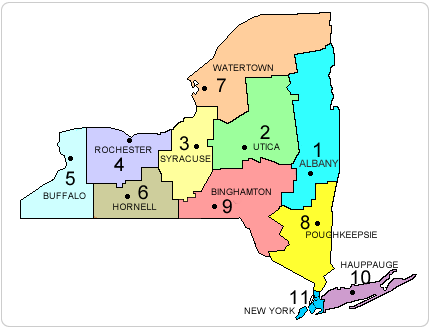

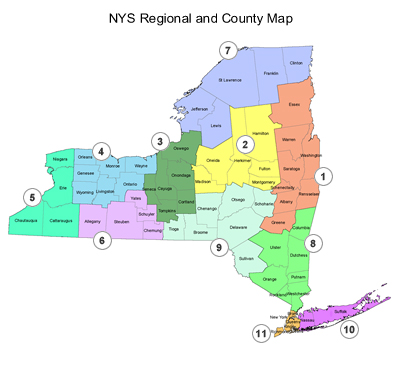

In [6]:
from IPython.display import Image, display
# display(Image('https://www.fdottampabay.com/assets/images/d7-service-area-map-new.png'))

display(Image('https://www.dot.ny.gov/rexdesign/design/regionsmap.png'))

display(Image('https://fishersisland.net/wp-content/uploads/2015/08/NYSDOT-regional-map-385-400x367.jpg'))


In [7]:
# filter on single county
df_geo_county = df_geo.loc[(df_geo['state_abbr'] == 'NY') &
                           # (df_geo['county'].isin(['Albany', 'Utica', 'Syracuse', 'Rochester', 'Buffalo', 'Hornell', 'Watertown', 'Poughkeepsie', 'Binghamton', 'Hauppauge', 'New York']))]
                           (df_geo['county'].isin(['Suffolk', 'Nassau', 'Queens', 'Kings', 'Richmond', 'New York', 
                                                   'Bronx', 'Rockland', 'Westchester', 'Putnam', 'Orange', 'Dutchess', 
                                                   'Ulster', 'Sullivan']))]

# Create a feature to check if zip code is valid
df_geo_county['valid_zip_code'] = df_geo_county.apply(lambda x: x['zipcode'].isnumeric(), axis = 1)
print('Dataset: ')
print(df_geo_county.groupby(['valid_zip_code', 'county'])['zipcode'].count())
print(' ')
print('Invalid zip codes: ', df_geo_county.loc[df_geo_county['valid_zip_code'] == False]['zipcode'].unique())

Dataset: 
valid_zip_code  county     
False           Bronx            1
                Dutchess         1
                Kings            1
                Nassau           4
                New York         2
                Orange           3
                Putnam           1
                Queens           3
                Richmond         1
                Suffolk          2
                Westchester      3
True            Bronx           25
                Dutchess        29
                Kings           37
                Nassau          68
                New York        65
                Orange          38
                Putnam           8
                Queens          61
                Richmond        12
                Rockland        25
                Suffolk        102
                Sullivan        48
                Ulster          48
                Westchester     69
Name: zipcode, dtype: int64
 
Invalid zip codes:  ['063HH' '100HH' '102HH' '103HH' '104

In [8]:
# filter on only valid zipcodes
df_geo_county_valid = df_geo_county.loc[df_geo_county['valid_zip_code'] == True]
print('Num of VALID zip codes: ', len(df_geo_county_valid))
df_geo_county_valid.head()

Num of VALID zip codes:  635


,state_fips,state,state_abbr,zipcode,county,city,valid_zip_code
18899,36,New york,NY,06390,Suffolk,NaN,True
18901,36,New york,NY,10001,New York,New york,True
18902,36,New york,NY,10002,New York,New york,True
18903,36,New york,NY,10003,New York,New york,True
18904,36,New york,NY,10004,New York,Governors island,True


In [9]:
# Get zip code from region field
df_filter['zipcode'] = df_filter.apply(lambda x: x['region'].split(':')[1].strip(), axis=1)

# Merge market data and geo zip codes
df_merge = pd.merge(
    df_filter,
    df_geo_county_valid[['zipcode', 'city', 'county']],
    # only return zip codes froom BOTH tables
    how  = 'inner', 
    # Field to join on
    on = ['zipcode']
)
print('Num of rows: ', len(df_merge))
df_merge.head()

Num of rows:  226793


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city_x,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,zipcode,city_y,county
0,2020-12-01,2021-02-28,90,zip code,2,3606,f,Zip Code: 11003,NaN,New York,NY,Single Family Residential,6,539000.0,0.026667,0.107914,549000.0,0.016667,0.055779,408.640136,0.011871,0.141103,411.062062,0.037845,0.062597,78,-0.178947,0.218750,14.0,-0.176471,0.166667,60.0,0.000000,-0.318182,56.0,-0.034483,-0.461538,NaN,NaN,NaN,41.0,-2.0,-22.0,1.001408,0.005220,0.012633,0.448718,0.048718,0.183093,0.339286,0.028941,-0.026099,0.428571,0.193277,0.345238,"Nassau County, NY",35004,2022-11-20 14:36:43,11003,Alden manor,Nassau
1,2016-11-01,2017-01-31,90,zip code,2,3606,f,Zip Code: 11003,NaN,New York,NY,Single Family Residential,6,390500.0,-0.011518,0.084722,399974.5,0.025839,0.066599,271.164021,0.000000,0.019086,285.279805,0.011739,0.067567,68,0.133333,0.192982,11.0,-0.500000,0.375000,58.0,-0.134328,0.017544,75.0,0.000000,-0.193548,NaN,NaN,NaN,68.5,5.5,-3.5,0.939108,-0.009570,-0.021912,0.132353,-0.050980,0.062178,0.293333,-0.053333,-0.040000,0.090909,-0.045455,-0.034091,"Nassau County, NY",35004,2022-11-20 14:36:43,11003,Alden manor,Nassau
2,2013-06-01,2013-08-31,90,zip code,2,3606,f,Zip Code: 11003,NaN,New York,NY,All Residential,-1,320000.0,0.032258,0.132743,349000.0,0.000000,0.057896,224.382227,0.013238,0.015224,253.095699,0.083934,0.120852,70,0.111111,0.296296,14.0,-0.066667,1.333333,104.0,0.106383,0.316456,151.0,0.034247,-0.095808,NaN,NaN,NaN,103.5,-37.5,-36.5,0.945135,-0.001686,-0.009727,0.057143,0.025397,-0.053968,0.298013,-0.010206,-0.055280,0.214286,0.014286,0.047619,"Nassau County, NY",35004,2022-11-20 14:36:43,11003,Alden manor,Nassau
3,2022-03-01,2022-05-31,90,zip code,2,3606,f,Zip Code: 11003,NaN,New York,NY,All Residential,-1,642500.0,0.019841,0.157658,640000.0,-0.013867,0.086587,469.387755,0.049371,0.287464,458.835332,-0.037603,0.123110,54,-0.114754,-0.084746,26.0,0.000000,0.083333,97.0,0.065934,0.077778,61.0,0.070175,-0.115942,NaN,NaN,NaN,31.0,-4.5,-3.0,1.005653,-0.000570,0.002521,0.481481,-0.043109,0.006905,0.377049,0.008628,0.174151,0.384615,0.115385,0.259615,"Nassau County, NY",35004,2022-11-20 14:36:43,11003,Alden manor,Nassau
4,2021-10-01,2021-12-31,90,zip code,2,3606,f,Zip Code: 11003,NaN,New York,NY,Multi-Family (2-4 Unit),4,801000.0,0.171909,0.953659,724995.0,0.035707,-0.009570,387.654321,0.087122,0.309515,462.320373,0.082913,0.259565,3,-0.500000,2.000000,4.0,3.000000,NaN,8.0,-0.272727,3.000000,5.0,-0.375000,4.000000,NaN,NaN,NaN,23.0,4.0,-68.0,1.033769,0.119774,0.258722,1.000000,0.333333,1.000000,0.400000,0.150000,NaN,0.250000,0.250000,NaN,"Nassau County, NY",35004,2022-11-20 14:36:43,11003,Alden manor,Nassau


# View Bad Data from Redfin

In [10]:
# choose a specific zip code / property type and view MoM change
# TODO: Future auto loop through each MoM column and recalculate
df_merge.loc[(df_merge['zipcode'] == '11763') & 
             (df_merge['property_type'] == 'Single Family Residential')]\
.sort_values(by=['period_begin']).tail(2)\
[['period_begin', 'median_dom', 'median_dom_mom', 'median_dom_yoy']]

,period_begin,median_dom,median_dom_mom,median_dom_yoy
76202,2022-07-01,21.0,-0.5,-1.0
76472,2022-08-01,27.5,6.5,1.5


In [11]:
# Test to correct the error
df_test = df_merge.copy()
df_test['median_dom_mom_correction'] = df_test.sort_values(by=['period_begin'])['median_dom'].pct_change()
df_test.loc[(df_test['zipcode'] == '11763') &
            (df_test['property_type'] == 'Single Family Residential')]\
.sort_values(by=['period_begin']).tail(2)\
[['period_begin', 'median_dom', 'median_dom_mom', 'median_dom_yoy', 'median_dom_mom_correction']]

,period_begin,median_dom,median_dom_mom,median_dom_yoy,median_dom_mom_correction
76202,2022-07-01,21.0,-0.5,-1.0,0.312500
76472,2022-08-01,27.5,6.5,1.5,0.037736


In [12]:
# Add Features
df_features = df_merge.copy()
print('Max begin date: ', df_features['period_begin'].max())
print('Max end date: ', df_features['period_end'].max())
max_end_date = df_features['period_end'].max()

# 1) flag for most recent date
df_features['latest_period'] = df_features.apply(
    lambda x: True if x['period_end'] == max_end_date else False, axis = 1)

# 2) remove Redfin city and keep Geo city
df_features = df_features.drop(columns = ['city_x'])
df_features = df_features.rename(columns={'city_y':'city'})

# 3) fix median days on market (bad data)
df_features['median_dom_mom'] = df_features.sort_values(by = ['period_begin'])['median_dom'].pct_change()

# view first 5 rows
df_features.head()

Max begin date:  2022-08-01
Max end date:  2022-10-31


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,zipcode,city,county,latest_period
0,2020-12-01,2021-02-28,90,zip code,2,3606,f,Zip Code: 11003,New York,NY,Single Family Residential,6,539000.0,0.026667,0.107914,549000.0,0.016667,0.055779,408.640136,0.011871,0.141103,411.062062,0.037845,0.062597,78,-0.178947,0.218750,14.0,-0.176471,0.166667,60.0,0.000000,-0.318182,56.0,-0.034483,-0.461538,NaN,NaN,NaN,41.0,-0.088889,-22.0,1.001408,0.005220,0.012633,0.448718,0.048718,0.183093,0.339286,0.028941,-0.026099,0.428571,0.193277,0.345238,"Nassau County, NY",35004,2022-11-20 14:36:43,11003,Alden manor,Nassau,False
1,2016-11-01,2017-01-31,90,zip code,2,3606,f,Zip Code: 11003,New York,NY,Single Family Residential,6,390500.0,-0.011518,0.084722,399974.5,0.025839,0.066599,271.164021,0.000000,0.019086,285.279805,0.011739,0.067567,68,0.133333,0.192982,11.0,-0.500000,0.375000,58.0,-0.134328,0.017544,75.0,0.000000,-0.193548,NaN,NaN,NaN,68.5,-0.690045,-3.5,0.939108,-0.009570,-0.021912,0.132353,-0.050980,0.062178,0.293333,-0.053333,-0.040000,0.090909,-0.045455,-0.034091,"Nassau County, NY",35004,2022-11-20 14:36:43,11003,Alden manor,Nassau,False
2,2013-06-01,2013-08-31,90,zip code,2,3606,f,Zip Code: 11003,New York,NY,All Residential,-1,320000.0,0.032258,0.132743,349000.0,0.000000,0.057896,224.382227,0.013238,0.015224,253.095699,0.083934,0.120852,70,0.111111,0.296296,14.0,-0.066667,1.333333,104.0,0.106383,0.316456,151.0,0.034247,-0.095808,NaN,NaN,NaN,103.5,-0.469231,-36.5,0.945135,-0.001686,-0.009727,0.057143,0.025397,-0.053968,0.298013,-0.010206,-0.055280,0.214286,0.014286,0.047619,"Nassau County, NY",35004,2022-11-20 14:36:43,11003,Alden manor,Nassau,False
3,2022-03-01,2022-05-31,90,zip code,2,3606,f,Zip Code: 11003,New York,NY,All Residential,-1,642500.0,0.019841,0.157658,640000.0,-0.013867,0.086587,469.387755,0.049371,0.287464,458.835332,-0.037603,0.123110,54,-0.114754,-0.084746,26.0,0.000000,0.083333,97.0,0.065934,0.077778,61.0,0.070175,-0.115942,NaN,NaN,NaN,31.0,-0.655556,-3.0,1.005653,-0.000570,0.002521,0.481481,-0.043109,0.006905,0.377049,0.008628,0.174151,0.384615,0.115385,0.259615,"Nassau County, NY",35004,2022-11-20 14:36:43,11003,Alden manor,Nassau,False
4,2021-10-01,2021-12-31,90,zip code,2,3606,f,Zip Code: 11003,New York,NY,Multi-Family (2-4 Unit),4,801000.0,0.171909,0.953659,724995.0,0.035707,-0.009570,387.654321,0.087122,0.309515,462.320373,0.082913,0.259565,3,-0.500000,2.000000,4.0,3.000000,NaN,8.0,-0.272727,3.000000,5.0,-0.375000,4.000000,NaN,NaN,NaN,23.0,0.095238,-68.0,1.033769,0.119774,0.258722,1.000000,0.333333,1.000000,0.400000,0.150000,NaN,0.250000,0.250000,NaN,"Nassau County, NY",35004,2022-11-20 14:36:43,11003,Alden manor,Nassau,False


# Output

In [13]:
date_str = datetime.datetime.today().strftime('%Y-%m')
print('Current year/month: ', date_str)

Current year/month:  2022-11


In [14]:
# Download file
df_features.to_csv(f'zip_realtor_{state_code}_{date_str}.csv', index=False)